# check

## import and basic info

In [ ]:
import pandas as pd 

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
df = pd.read_csv("user_behavior_dataset.csv")
print(df.head())

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                

In [6]:
print(df.describe())

         User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.00000                700.000000                  700.000000   
mean   350.50000                271.128571                    5.272714   
std    202.21688                177.199484                    3.068584   
min      1.00000                 30.000000                    1.000000   
25%    175.75000                113.250000                    2.500000   
50%    350.50000                227.500000                    4.900000   
75%    525.25000                434.250000                    7.400000   
max    700.00000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               700.000000                700.000000           700.000000   
mean               1525.158571                 50.681429           929.742857   
std                 819.136414                 26.943324           640.451729   
min      

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None


## simple check

In [ ]:
dmcounts = df['Device Model'].value_counts()
print(dmcounts)

Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: Device Model, dtype: int64


In [ ]:
oscounts = df['Operating System'].value_counts()
print(oscounts)
## yeah, iphone vs others of course what am I thinking

Android    554
iOS        146
Name: Operating System, dtype: int64


In [ ]:
gendercounts = df['Gender'].value_counts()
print(gendercounts)
## total 700

Male      364
Female    336
Name: Gender, dtype: int64


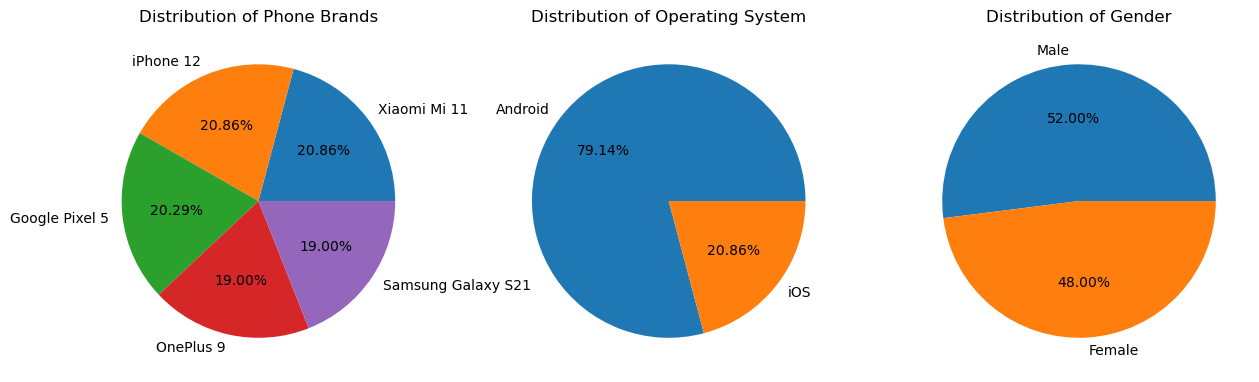

In [16]:
tdf = df['Device Model'].value_counts().reset_index()
tdf.columns = ['Device Model', 'count']
tdf1 = df['Operating System'].value_counts().reset_index()
tdf1.columns = ['Operating System', 'count']
tdf2 = df['Gender'].value_counts().reset_index()
tdf2.columns = ['Gender', 'count']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].pie(x=tdf['count'], labels=tdf['Device Model'], autopct='%.2f%%')
ax[0].set_title("Distribution of Phone Brands")
ax[1].pie(x=tdf1['count'], labels=tdf1['Operating System'], autopct='%.2f%%')
ax[1].set_title("Distribution of Operating System")
ax[2].pie(x=tdf2['count'], labels=tdf2['Gender'], autopct='%.2f%%')
ax[2].set_title("Distribution of Gender")
plt.show()

# Preparation